# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 6)
import seaborn as sns

## Loading Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [5]:
train['subject'].value_counts()

subject
25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: count, dtype: int64

# Data preprocessing

### Null

In [6]:
print('Total number of missing values in train : ', train.isna().values.sum())
print('Total number of missing values in train : ', test.isna().values.sum())

Total number of missing values in train :  0
Total number of missing values in train :  0


### Dublicates

In [7]:
print('Number of duplicates in train : ',sum(train.duplicated()))
print('Number of duplicates in test : ', sum(test.duplicated()))

Number of duplicates in train :  0
Number of duplicates in test :  0


### Imbalance

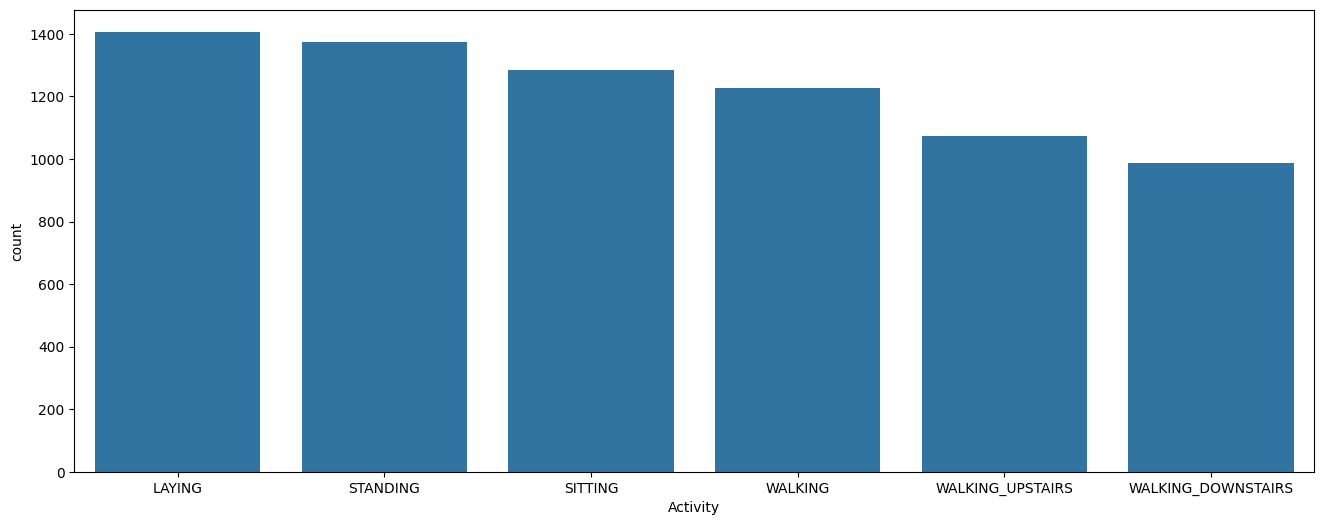

In [8]:
sns.countplot(x=train['Activity'], order=train['Activity'].value_counts().index)
plt.show()

# EDA

## Features types

In [9]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [10]:
from collections import Counter

In [11]:
d = Counter([col.split('-')[0].split('(')[0] for col in train.columns])
pd.DataFrame.from_dict(d, orient="index").rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


Based on the common nature of activities we can broadly put them in two categories.

**Static and dynamic activities :**  
- SITTING, STANDING, LAYING can be considered as static activities with no motion involved  

- WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS can be considered as dynamic activities with significant amount of motion involved

## Analysing tBodyAccMag-mean feature

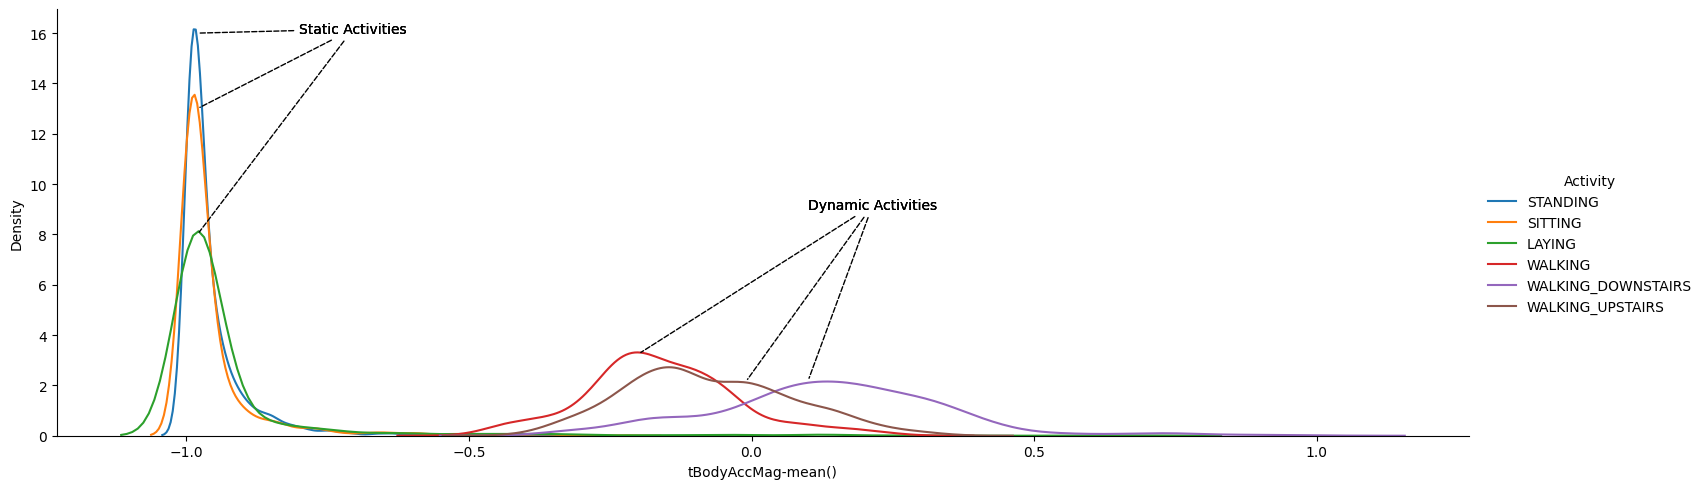

In [12]:
facetgrid = sns.FacetGrid(train, hue = 'Activity', height = 5, aspect = 3)
facetgrid.map(sns.kdeplot, 'tBodyAccMag-mean()').add_legend()

plt.annotate("Static Activities", xy = (-.98, 8), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy = (-.98, 13), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy = (-.98, 16), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

plt.annotate("Dynamic Activities", xy=(-0.2,3.25), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(0.1,2.18), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.01,2.15), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

plt.show()

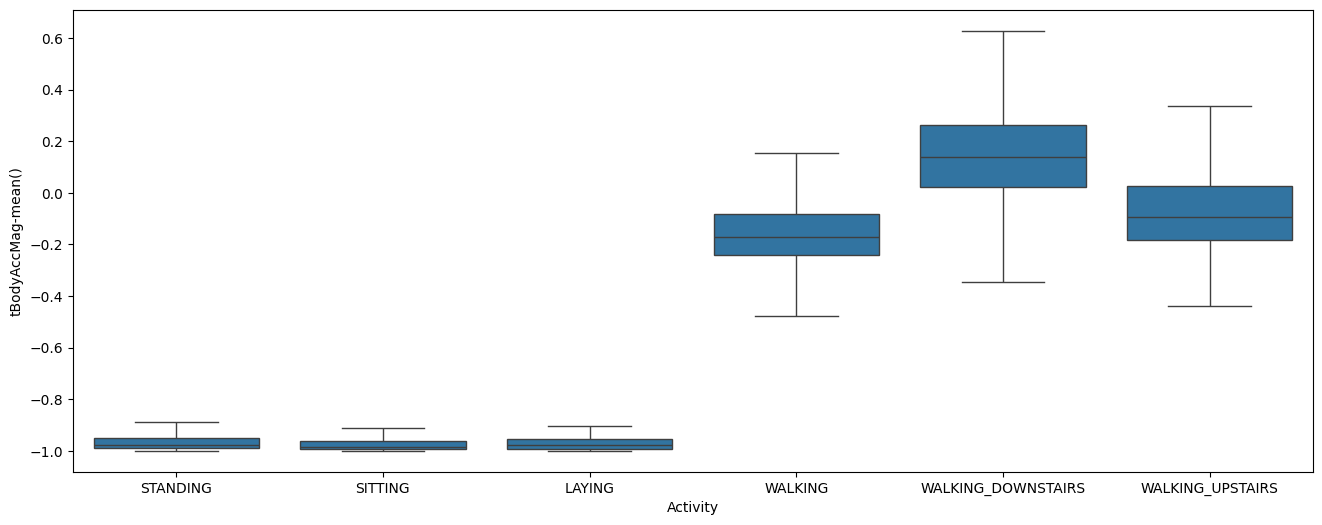

In [13]:
sns.boxplot(x = "Activity", y="tBodyAccMag-mean()", data = train, showfliers = False)
plt.show()

## Analysing Angle between X-axis and Y-axis and gravityMean feature

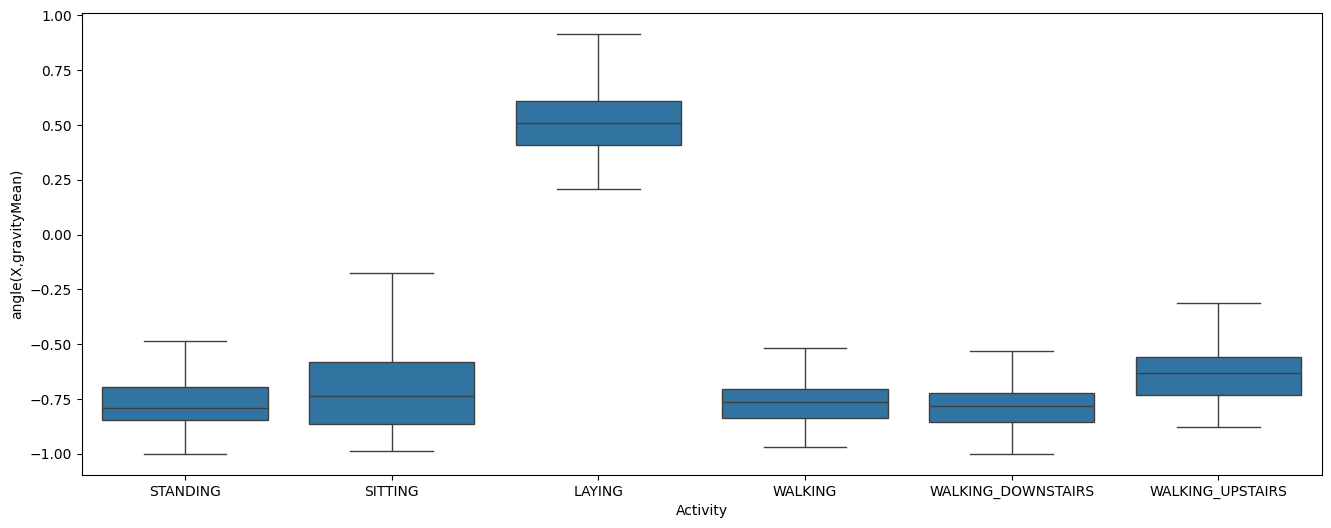

In [14]:
sns.boxplot(x = "Activity", y="angle(X,gravityMean)", data = train, showfliers = False)
plt.show()

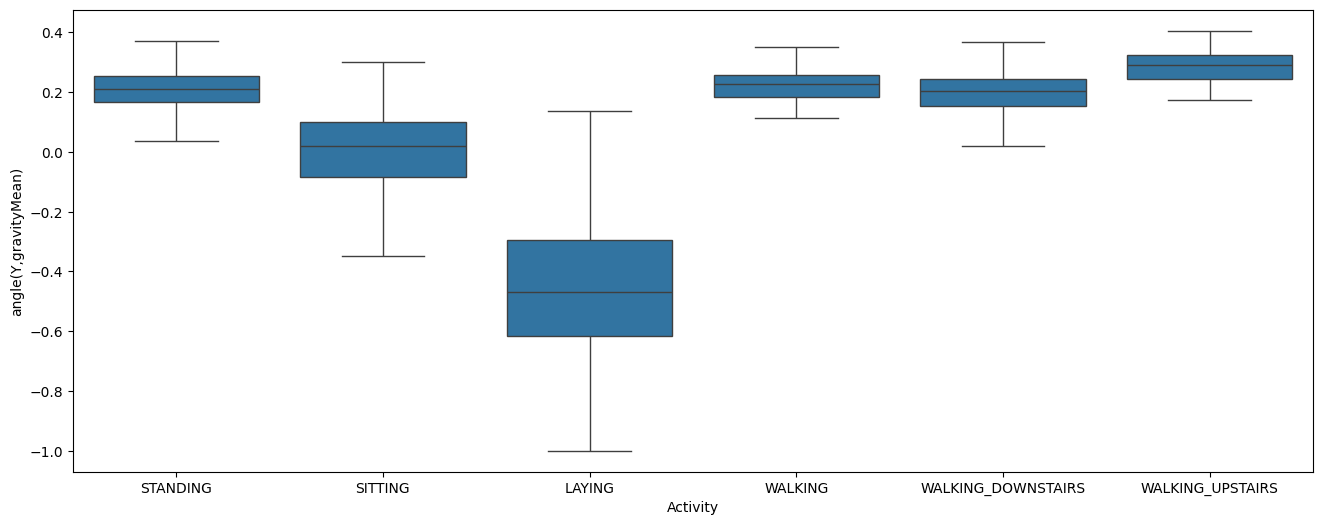

In [15]:
sns.boxplot(x = "Activity", y="angle(Y,gravityMean)", data = train, showfliers = False)
plt.show()

## Visualising

### PCA

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
x = train.drop(columns=['Activity', 'subject'])
x = StandardScaler().fit_transform(x)

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

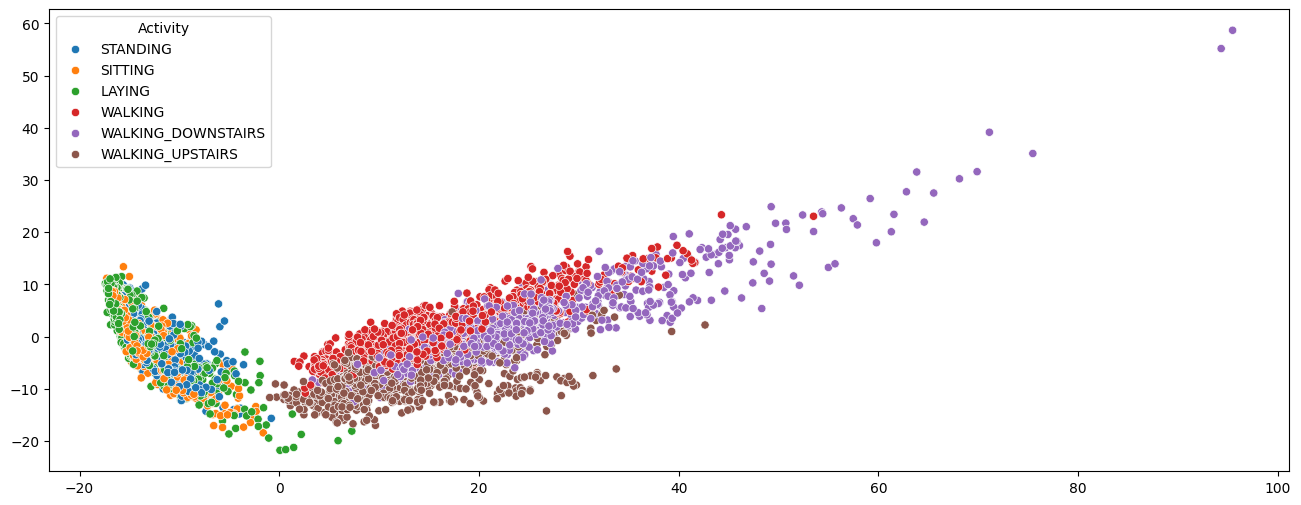

In [19]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=train['Activity'])
plt.show()

### t-SNE

In [20]:
from sklearn.manifold import TSNE

In [21]:
x = train.drop(columns=['Activity', 'subject'])

In [22]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(x)

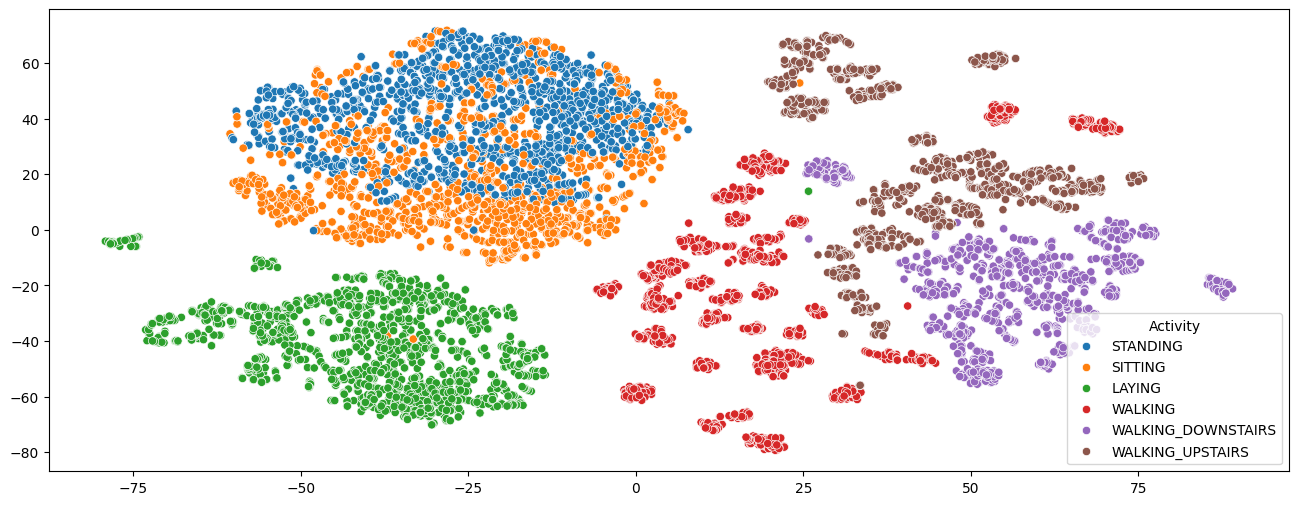

In [23]:
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=train['Activity'])
plt.show()

# Machine Learing

## Preprocessing

In [24]:
x_train = train.drop(columns=['Activity', 'subject'])
y_train = train['Activity']

x_test = test.drop(columns=['Activity', 'subject'])
y_test = test['Activity']

# x_train = StandardScaler().fit_transform(x_train)
# x_test = StandardScaler().fit_transform(x_test)


In [25]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix


In [26]:
def plot_confusion_matrix(real, pred):
    cm = confusion_matrix(real, pred)
    labels = np.unique(real)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    ax = plt.gca()
    ax.set(xticklabels=labels, yticklabels=labels, ylabel='True label', xlabel='Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

## Models

### Logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression()
param_grid = {
    'max_iter': [100, 200, 500]
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
y_pred = grid_search.predict(x_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [29]:
print('Logistic regression\nScore:', round(grid_search.score(x_test, y_test), 2))
print("Best set of parameters : ", grid_search.best_params_)

Logistic regression
Score: 0.95
Best set of parameters :  {'max_iter': 200}


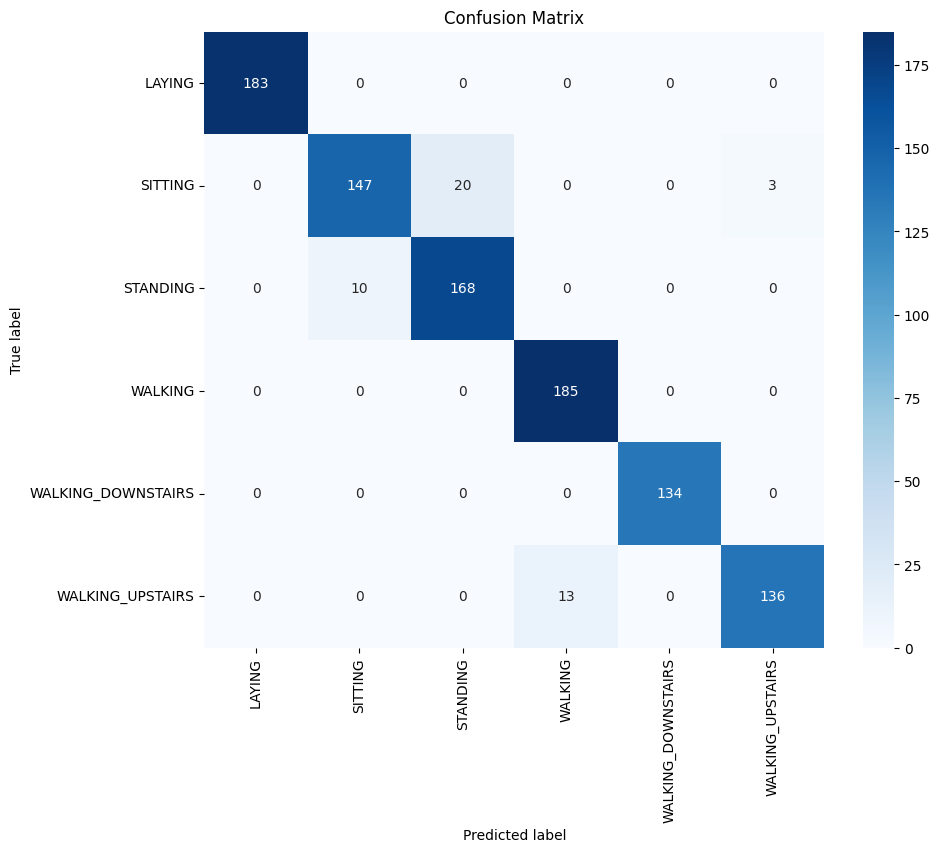

In [30]:
plot_confusion_matrix(y_test, y_pred)

### SVM

In [31]:
from sklearn.svm import SVC

In [32]:
model = SVC()
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [100, 50]
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
y_pred = grid_search.predict(x_test)

In [33]:
print('Support Vector Machine\nScore:', round(grid_search.score(x_test, y_test), 2))
print("Best set of parameters : ", grid_search.best_params_)

Support Vector Machine
Score: 0.97
Best set of parameters :  {'C': 100, 'kernel': 'rbf'}


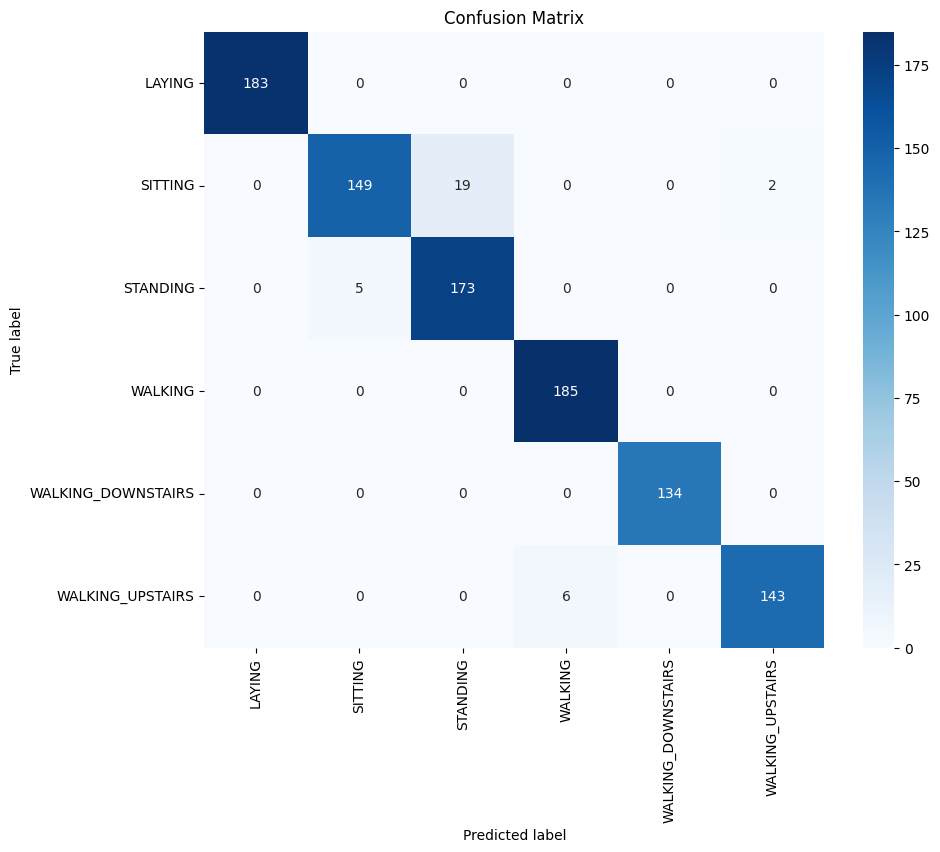

In [34]:
plot_confusion_matrix(y_test, y_pred)

### Decision Tree 

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
model = DecisionTreeClassifier()
param_grid = {
    'max_depth': np.arange(2, 10, 2)
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
y_pred = grid_search.predict(x_test)

In [37]:
print('Decision Tree\nScore:', round(grid_search.score(x_test, y_test), 2))
print("Best set of parameters : ", grid_search.best_params_)

Decision Tree
Score: 0.85
Best set of parameters :  {'max_depth': 8}


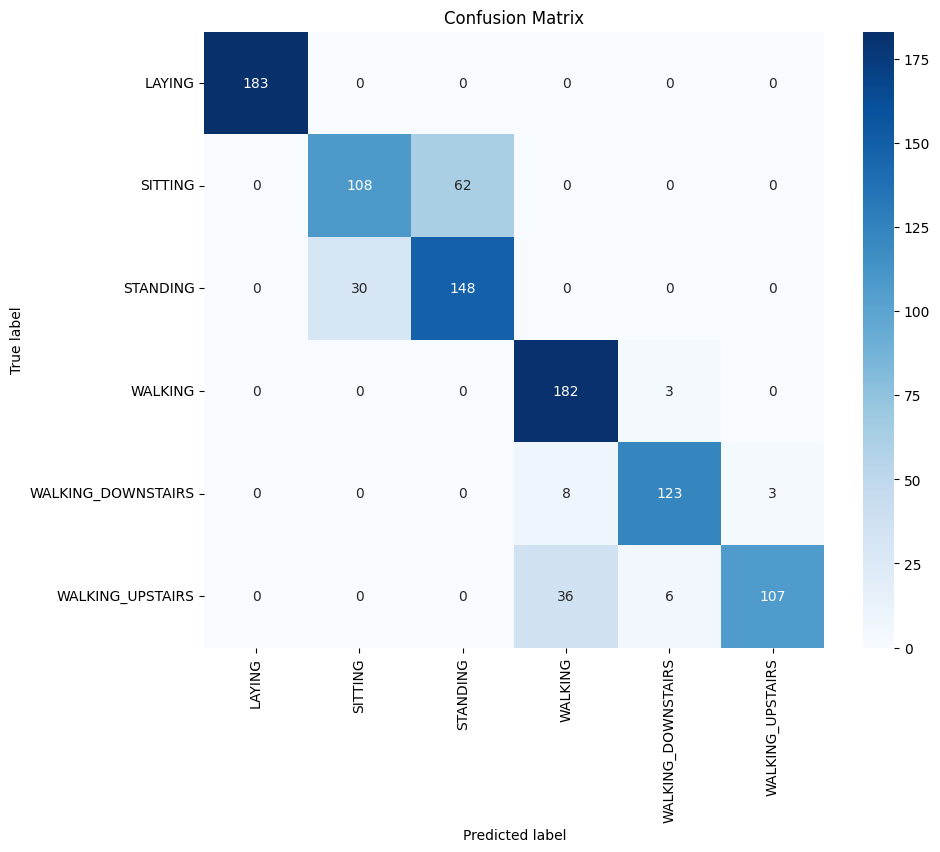

In [38]:
plot_confusion_matrix(y_test, y_pred)

### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators':np.arange(80, 121, 10), 
    'max_depth': np.arange(10, 15, 2)
}
grid_search = RandomizedSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
y_pred = grid_search.predict(x_test)

In [ ]:
print('Random Forest\nScore:', round(grid_search.score(x_test, y_test), 2))
print("Best set of parameters : ", grid_search.best_params_)

Random Forest
Score: 0.9
Best set of parameters :  {'n_estimators': 100, 'max_depth': 10}


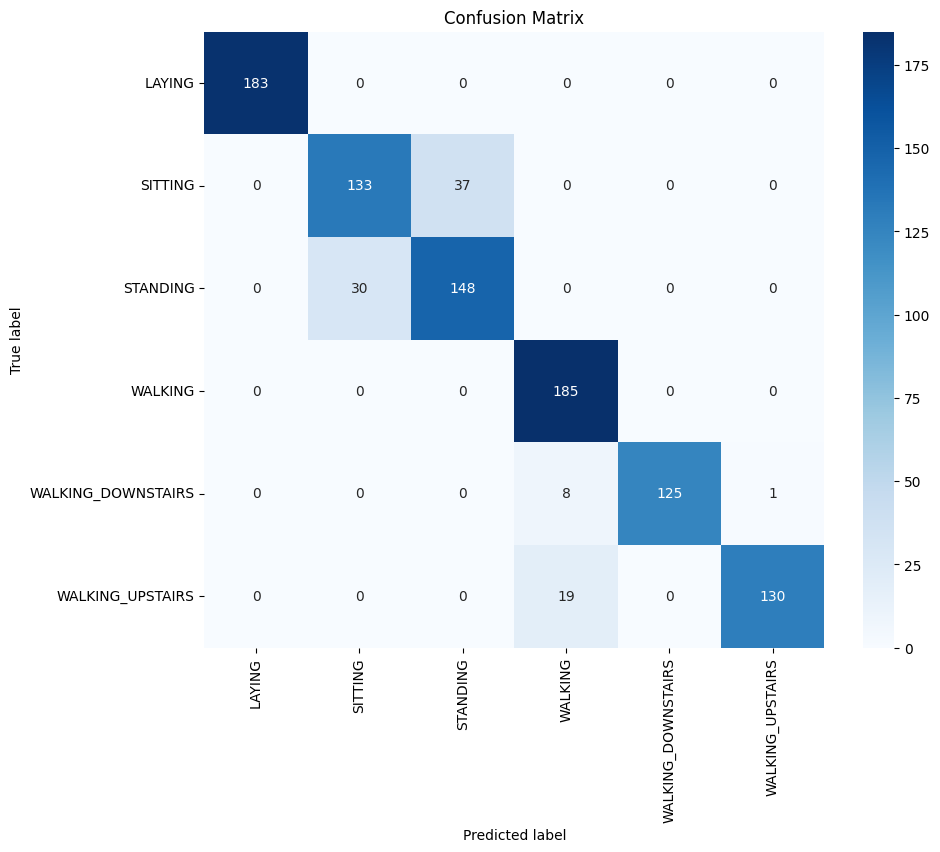

In [ ]:
plot_confusion_matrix(y_test, y_pred)

### Extra Trees

In [44]:
from sklearn.ensemble import ExtraTreesClassifier

In [46]:
model = ExtraTreesClassifier()
param_grid = {
    'n_estimators':np.arange(70, 101, 10), 
    'max_depth': np.arange(8, 17, 2)
}
grid_search = RandomizedSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
y_pred = grid_search.predict(x_test)

In [47]:
print('Extra Trees\nScore:', round(grid_search.score(x_test, y_test), 2))
print("Best set of parameters : ", grid_search.best_params_)

Extra Trees
Score: 0.94
Best set of parameters :  {'n_estimators': 70, 'max_depth': 16}


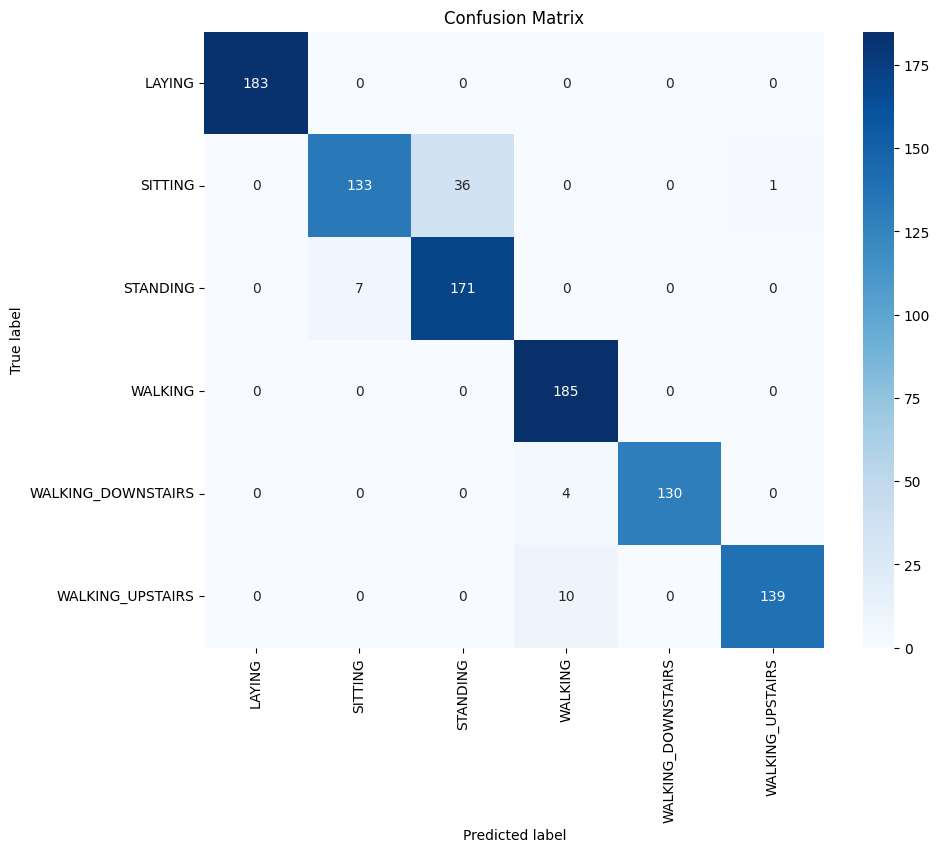

In [48]:
plot_confusion_matrix(y_test, y_pred)